In [2]:
import subprocess, tskit
import matplotlib.pyplot as plt
import numpy as np

In [65]:

ts = tskit.load("../t_5N.trees")
ts = ts.simplify()

# Measure the tree height at each base position
height_for_pos = np.zeros(int(ts.sequence_length))
for tree in ts.trees():
    mean_height = np.mean([tree.time(root) for root in tree.roots])
    left, right = map(int, tree.interval)
    height_for_pos[left: right] = mean_height

# Convert heights along chromosome into heights at distances from gene


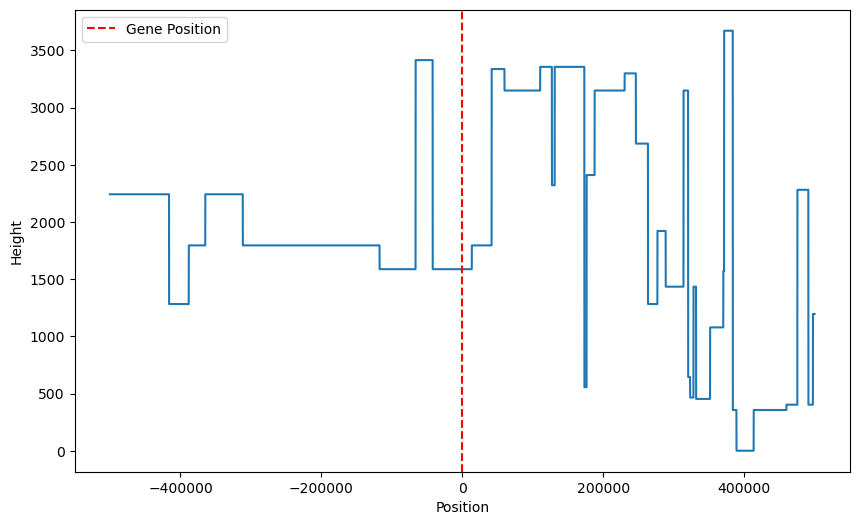

In [66]:


# Normalize heights
height_for_pos = height_for_pos - np.min(height_for_pos)

L = int(1e6)  # total chromosome length

distances = np.arange(L+1)
distances = distances - L / 2
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(distances, height_for_pos,)
plt.axvline(x=0, color='r', linestyle='--', label='Gene Position')
plt.xlabel('Position')
plt.ylabel('Height')
plt.legend()
plt.show()